# Similarity of Songs

<pre>
Index: 
1.) Objective
2.) Database Description 
3.) Description about data set
4.) extract Data from Hdf5 
5.) Data Cleaning 
6.) Feature Extraction 
     .) Derive Features from existing features
     .) Univariant Analysis 
     .) Bi-Variant Analysis 
         plot Correlation Matrix 
     .) T-SNE
</pre>

## Objective:- Predict Similarity among 10,000 Songs 

<pre>
Data Source:
   The data is taken from the Echonest dataset of Million songs. Among them we have taken 1% of data.
Database Description:
    1, 10,000 Songs are Given.
    2, Artist Data
    3, Songs Related Data
    4, from three different music sites(Echo nest,7digital, Music Brainz), Tags are given to each song and Artist
</pre>

| Feature Name|  Data Type  | Definition |
|-------------|-------------|-------|--------------|-----------|
|artist familiarity 	|float| how much buzz the artist is getting till from the past .|
|artist hotttnesss| 	float |	how much buzz the artist is getting  right now.algorithmic estimation range(0-1) and some missing values|
|song hotttnesss| 	float |	algorithmic estimation range(0-1) and some missing values|
|artist id| 	string| 	Echo Nest ID  18 bit long|
|artist latitude| 	float 	|latitude and some missing values |
|artist location |	string 	|location name and some missing values	|
|artist longitude |	float |	longitude missing and neg values	|
|artist mbid |	string |	ID from musicbrainz.org, 36 bit long|
|artist mbtags| 	array string |	tags from musicbrainz.org ,some empty tags|	
|artist mbtags count |	array int| 	tag counts for musicbrainz tags|
|artist name |	string |	artist name |
|artist playmeid |	int |	ID from playme.com, or -1, many have -1 |
|artist terms |	array string |	Echo Nest tags 	|
|artist terms freq |	array float |	Echo Nest tags freqs Track per artist|	|
|artist terms weight |	array float |	Echo Nest tags weight, echonest assigned a weight to every tag|
|artist release 7digitalid |	int |	ID from 7digital.com or -1, min value is 63|
|audio md5| 	string 	|audio hash code, 32 bit code| 	
|bars confidence |	array float |	confidence measure |
|bars start| 	array float |	beginning of bars, usually on a beat |
|beats confidence |	array float |	confidence measure 	|
|beats start |	array float |	result of beat tracking |
|danceability |	float |	algorithmic estimation, zero for all	|
|duration |	float| 	in seconds 	|
|end of fade in |	float |	seconds at the beginning of the song |
|energy |	float |	energy from listener point of view , zero for all, therefor neglect this feature|	
|key 	|int |	key the song is in 	|
|key confidence| 	float |	confidence measure|	
|loudness |	float 	|overall loudness in dB 	|
|mode |	int |	major or minor 	|
|Analysis Sample Rate  | table|  value is 22050 for all   |
|mode confidence |	float| 	confidence measure |
|release| 	string |	album name |	
|release 7digitalid |	int |	ID from 7digital.com or -1 |
|sections confidence |	array float |	confidence measure |
|sections start |	array float |	largest grouping in a song, e.g. verse |
|segments confidence |	array float |	confidence measure 	|
|segments loudness max |	array float |	max dB value 	|
|segments loudness max time |	array float |	time of max dB value, i.e. end of attack |
|segments loudness max start |	array float |	dB value at onset |
|segments pitches |	2D array float |	chroma feature, one value per note |
|segments start |	array float |	musical events, ~ note onsets |
|segments timbre |	2D array float| 	texture features (MFCC+PCA-like)|
|-------------|-------------|-------|--------------|-----------|




[ 'get_song_id', 'get_release', 'get_artist_hotttnesss', 'get_title', 'get_segments_timbre', 'get_artist_longitude', 'get_beats_confidence', 'get_end_of_fade_in', 'get_time_signature', 'get_artist_id', 'get_sections_start', 'get_mode', 'get_loudness', 'get_artist_7digitalid', 'get_artist_terms_freq', 'get_similar_artists', 'get_artist_terms_weight', 'get_mode_confidence', 'get_segments_loudness_max_time', 'get_artist_familiarity', 'get_song_hotttnesss', 'get_time_signature_confidence', 'get_artist_name', 'get_key', 'get_artist_playmeid', 'get_artist_mbtags', 'get_analysis_sample_rate', 'get_year', 'get_key_confidence', 'get_artist_location', 'get_tatums_start', 'get_audio_md5', 'get_bars_start', 'get_bars_confidence', 'get_artist_mbid', 'get_track_7digitalid', 'get_artist_terms', 'get_segments_pitches', 'get_segments_confidence', 'get_segments_loudness_start', 'get_energy', 'get_segments_start', 'get_segments_loudness_max', 'get_duration', 'get_artist_mbtags_count', 'get_release_7digitalid', 'get_tatums_confidence', 'get_track_id', 'get_tempo', 'get_start_of_fade_out', 'get_beats_start', 'get_num_songs', 'get_sections_confidence', 'get_artist_latitude']

#### Import required libraries.

In [1]:
import os
import sys
import hdf5_getters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import h5py as h5
import soundfile as sf
import statsmodels.graphics.gofplots as s1
import pylab
import seaborn as sns
import glob
%matplotlib inline

In [2]:
path="C:\Users\meghana gotlur\python pgms\MillionSongSubset\data\A\X\L\TRAXLZU12903D05F94.h5"
h5 = hdf5_getters.open_h5_file_read(path)
title = hdf5_getters.get_title(h5)
print type(title)
print len(title)
print hdf5_getters.get_artist_name(h5)
print hdf5_getters.get_danceability(h5)
print h5

<type 'numpy.string_'>
23
Rick Astley
0.0
C:\Users\meghana gotlur\python pgms\MillionSongSubset\data\A\X\L\TRAXLZU12903D05F94.h5 (File) 'H5 Song File'
Last modif.: 'Mon Dec 20 01:01:20 2010'
Object Tree: 
/ (RootGroup) 'H5 Song File'
/analysis (Group) 'Echo Nest analysis of the song'
/analysis/bars_confidence (EArray(99,), shuffle, zlib(1)) 'array of confidence of bars'
/analysis/bars_start (EArray(99,), shuffle, zlib(1)) 'array of start times of bars'
/analysis/beats_confidence (EArray(397,), shuffle, zlib(1)) 'array of confidence of sections'
/analysis/beats_start (EArray(397,), shuffle, zlib(1)) 'array of start times of beats'
/analysis/sections_confidence (EArray(10,), shuffle, zlib(1)) 'array of confidence of sections'
/analysis/sections_start (EArray(10,), shuffle, zlib(1)) 'array of start times of sections'
/analysis/segments_confidence (EArray(935,), shuffle, zlib(1)) 'array of confidence of segments'
/analysis/segments_loudness_max (EArray(935,), shuffle, zlib(1)) 'array of ma

# Reading data from HDF5 files

# Total number of songs in given data

In [3]:
def count_all_files(basedir,ext='.h5') :
    cnt = 0
    for root, dirs, files in os.walk(basedir):
        files = glob.glob(os.path.join(root,'*'+ext))
        cnt += len(files)
    return cnt
song_count=count_all_files('MillionSongSubset\data')
print "We have totally %d songs"%song_count

We have totally 10000 songs


In [4]:
arr=np.empty((10000,55),dtype=object)

In [5]:
def get_all(basedir,ext='.h5') :
    m=0
    n=0
    for root, dirs, files in os.walk(basedir):
        files = glob.glob(os.path.join(root,'*'+ext))
        for f in files:
            h5 = hdf5_getters.open_h5_file_read(f)
            for i in hdf5_getters.__dict__.keys():
                if i[0:4]=='get_':
                    res = hdf5_getters.__getattribute__(i)(h5)
                    arr[m,n]=res
                    n+=1
            h5.close()
            n=0
            m+=1

In [6]:
get_all('MillionSongSubset\data')

In [7]:
print arr.shape

(10000L, 55L)


We are taking the feature names in a list and append it as column names in the dataframe.

In [8]:
lst=[]
lst=filter(lambda x: x[:3] == 'get',hdf5_getters.__dict__.keys())

Here we are storing the data in a dataframe df.

In [9]:
df=pd.DataFrame(arr,columns=lst)
df.head()

,get_danceability,get_song_id,get_release,get_artist_hotttnesss,get_title,get_segments_timbre,get_artist_longitude,get_beats_confidence,get_end_of_fade_in,get_time_signature,...,get_artist_mbtags_count,get_release_7digitalid,get_tatums_confidence,get_track_id,get_tempo,get_start_of_fade_out,get_beats_start,get_num_songs,get_sections_confidence,get_artist_latitude
0,0,SOMZWCG12A8C13C480,Fear Itself,0.401998,I Didn't Mean To,"[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",NaN,"[0.834, 0.851, 0.65, 0.635, 0.532, 0.753, 0.62...",0.247,4,...,[],300848,"[0.779, 0.734, 0.674, 0.637, 0.597, 0.532, 0.4...",TRAAAAW128F429D538,92.198,218.932,"[0.58521, 1.19196, 1.78893, 2.37813, 2.94247, ...",1,"[1.0, 1.0, 0.218, 0.133, 0.384, 0.326, 0.373, ...",NaN
1,0,SOCIWDW12A8C13D406,Dimensions,0.4175,Soul Deep,"[[0.0, 171.13, 9.469, -28.48, 57.491, -50.067,...",-90.0489,"[1.0, 0.945, 0.714, 0.973, 0.818, 0.974, 0.878...",0.148,4,...,[1],300822,"[0.969, 0.929, 0.897, 0.871, 0.856, 0.845, 0.8...",TRAAABD128F429CF47,121.274,137.915,"[0.20627, 0.71054, 1.21836, 1.71841, 2.21729, ...",1,"[1.0, 0.451, 0.27, 0.397, 0.225, 0.426, 0.459,...",35.1497
2,0,SOXVLOJ12AB0189215,Las Numero 1 De La Sonora Santanera,0.343428,Amor De Cabaret,"[[0.0, 171.124, 9.459, -28.489, 57.482, -50.06...",NaN,"[0.98, 0.399, 0.185, 0.27, 0.422, 0.0, 0.445, ...",0.282,1,...,[],514953,"[0.482, 0.676, 0.627, 0.549, 0.279, 0.264, 0.2...",TRAAADZ128F9348C2E,100.07,172.304,"[0.73152, 1.39732, 2.04852, 2.68691, 3.315, 3....",1,"[1.0, 0.121, 0.214, 0.198, 0.66, 0.468, 0.591,...",NaN
3,0,SONHOTT12A8C13493C,Friend Or Foe,0.454231,Something Girls,"[[24.937, 37.465, 177.22, -216.443, 56.3, 202....",NaN,"[0.809, 0.616, 0.789, 0.66, 0.439, 0.758, 0.60...",0,4,...,"[1, 1, 1]",287650,"[0.601, 0.556, 0.523, 0.49, 0.466, 0.44, 0.428...",TRAAAEF128F4273421,119.293,217.124,"[0.81002, 1.30621, 1.80617, 2.2996, 2.80049, 3...",1,"[1.0, 0.086, 0.153, 0.146, 0.088, 0.217, 0.372...",NaN
4,0,SOFSOCN12A8C143F5D,Muertos Vivos,0.401724,Face the Ashes,"[[0.089, 169.621, 5.435, -30.061, 54.144, -50....",NaN,"[0.883, 0.738, 0.484, 0.609, 0.625, 0.719, 0.4...",0.066,4,...,[],611336,"[1.0, 0.98, 0.932, 0.87, 0.82, 0.793, 0.768, 0...",TRAAAFD128F92F423A,129.738,198.699,"[0.13576, 0.59914, 1.06368, 1.52591, 1.99045, ...",1,"[1.0, 0.768, 0.611, 0.388, 0.52, 0.42, 0.499, ...",NaN


In [10]:
df.columns

Index([u'get_danceability', u'get_song_id', u'get_release',
       u'get_artist_hotttnesss', u'get_title', u'get_segments_timbre',
       u'get_artist_longitude', u'get_beats_confidence', u'get_end_of_fade_in',
       u'get_time_signature', u'get_artist_id', u'get_sections_start',
       u'get_mode', u'get_loudness', u'get_artist_7digitalid',
       u'get_artist_terms_freq', u'get_similar_artists',
       u'get_artist_terms_weight', u'get_mode_confidence',
       u'get_segments_loudness_max_time', u'get_artist_familiarity',
       u'get_song_hotttnesss', u'get_time_signature_confidence',
       u'get_artist_name', u'get_key', u'get_artist_playmeid',
       u'get_artist_mbtags', u'get_analysis_sample_rate', u'get_year',
       u'get_key_confidence', u'get_artist_location', u'get_tatums_start',
       u'get_audio_md5', u'get_bars_start', u'get_bars_confidence',
       u'get_artist_mbid', u'get_track_7digitalid', u'get_artist_terms',
       u'get_segments_pitches', u'get_segments_confiden

First hand analysis on data.

| Unique Features | Unique Values |
|-----------------|---------------|
| Artist id       | 3888   |
| Mb tags         | 726    |
| EchoNest tags   | 3502   |
| Track id        | 10000  |
| Song id         | 10000  |
| Song title      | 9709   |
| year            | 68     |
| Artist 7 digitalid|3867  |
| Artist location |  1046  |
| Artist latitude | 623    |
| Artist longitude| 624    |
| Artist mbid     | 3489   |
| Analysis sample rate|1   |
| Artist familiarity| 4048 |
| Artist hotness  | 3714   |
| Artist name     | 4412   |
| Artist playmeid | 1915   |
| Song duration   | 6553   |
| Song end of fade in| 1422 |
| Song start of fade out|9096|
| Release album   | 7834   |
| Time signature  | 6      |
| Tempo           | 9336   |

# Create a set Containing Unique Tags from each site(Echo nest, 7digital and musicbrainz)

In [11]:
uniq_tags=pd.read_csv("C:\Users\meghana gotlur\python pgms\MillionSongSubset\AdditionalFiles\subset_unique_mbtags.txt")
print uniq_tags.shape
uniq_tags.head()

(726, 1)


,mbtags
0,00s
1,1 13 165900 150 7672 22647 34612 48720 59280 7...
2,1 7 186240 183 23558 41608 89158 111733 150833...
3,10s
4,1960s


In [12]:
uniq_terms=pd.read_csv("C:\Users\meghana gotlur\python pgms\MillionSongSubset\AdditionalFiles\subset_unique_terms.txt")
print uniq_terms.shape
uniq_terms.head()

(3502, 1)


,terms
0,00s
1,00s country
2,00s pop
3,1800s
4,1910s


In [13]:
tags=set()
for i in range(3502):
    tags.add(uniq_terms['terms'][i])

In [14]:
for i in range(726):
    tags.add(uniq_tags['mbtags'][i])

# Total unique tags : 3838

In [15]:
print "Total number of unique tags are %d"%len(tags)

Total number of unique tags are 3838


# Derive new features from given features
<pre>
  1) segment count
  2) segment density
  3) beat count
  4) beat density
  5) bar count
  6) bar density
</pre>

#### Segment count

In [16]:
def count_values(feature):
    count=np.empty(10000)
    for i in range(10000):
        l=len(df[feature][i])
        count[i]=l
    return count

In [17]:
df['seg_cnt']=count_values('get_segments_confidence')
df['seg_cnt'].head()

0    971.0
1    550.0
2    562.0
3    821.0
4    673.0
Name: seg_cnt, dtype: float64

#### Beat count

In [18]:
df['beat_cnt']=count_values('get_beats_confidence')
df['beat_cnt'].head()

0    344.0
1    296.0
2    291.0
3    462.0
4    444.0
Name: beat_cnt, dtype: float64

#### Bars count

In [19]:
df['bars_cnt']=count_values('get_bars_confidence')
df['bars_cnt'].head()

0     83.0
1     73.0
2    291.0
3    115.0
4    110.0
Name: bars_cnt, dtype: float64

In [20]:
def cal_density(feature):
    density=np.empty(10000)
    for i in range(10000):
        density[i]=(df[feature][i])/(df['get_duration'][i])
    return density

#### Segment density

In [21]:
df['seg_density']=cal_density('seg_cnt')
df['seg_density'].head()

0    4.435171
1    3.715326
2    3.166635
3    3.517512
4    3.210785
Name: seg_density, dtype: float64

#### Beat density

In [22]:
df['beat_density']=cal_density('beat_cnt')
df['beat_density'].head()

0    1.571266
1    1.999521
2    1.639663
3    1.979404
4    2.118259
Name: beat_density, dtype: float64

#### Bar density

In [23]:
df['bar_density']=cal_density('bars_cnt')
df['bar_density'].head()

0    0.379114
1    0.493125
2    1.639663
3    0.492709
4    0.524794
Name: bar_density, dtype: float64

#### Tatum count

In [24]:
df['tatum_cnt']=count_values('get_tatums_confidence')
df['tatum_cnt'].head()

0    688.0
1    591.0
2    582.0
3    924.0
4    887.0
Name: tatum_cnt, dtype: float64

#### Section count

In [25]:
df['section_cnt']=count_values('get_sections_confidence')
df['section_cnt'].head()

0    10.0
1     9.0
2     8.0
3    11.0
4     9.0
Name: section_cnt, dtype: float64

#### Tatum Density

In [26]:
df['tatum_density']=cal_density('tatum_cnt')
df['tatum_density'].head()

0    3.142531
1    3.992287
2    3.279327
3    3.958807
4    4.231747
Name: tatum_density, dtype: float64

#### Section Density

In [27]:
df['section_density']=cal_density('section_cnt')
df['section_density'].head()

0    0.045676
1    0.060796
2    0.045077
3    0.047129
4    0.042938
Name: section_density, dtype: float64

# Create song-labels
We consider it in order as 
<pre>
 1) album name
 2) song name
 3) artist name
</pre>

In [28]:
song_label=df['get_release'] +" -" +df['get_title']+" - "+df['get_artist_name']
print song_label.shape

(10000L,)


# Analysis on segment count

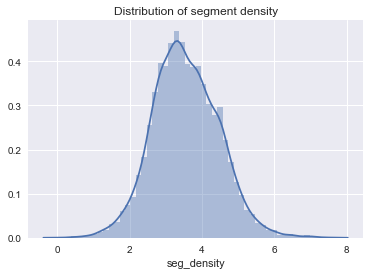

In [29]:
sns.distplot(df['seg_density'])
plt.title("Distribution of segment density")
plt.show()

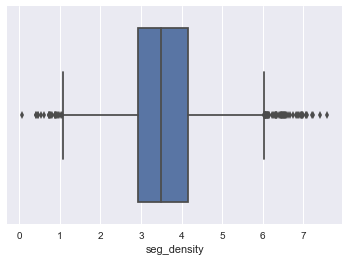

In [30]:
sns.boxplot(df['seg_density'])
plt.show()

In [31]:
out_liers_seg = [x for x in df['seg_density'] if x >= 3.50196099505 and x< 4.16517668927]
print "Outliers based on segment-density %d"%(len(out_liers_seg))

Outliers based on segment-density 2500


In [32]:
print ("(0th %, 25th%, 50th%, 75th%, 100th% respectively):", np.percentile(df['seg_density'], 0), np.percentile(df['seg_density'], 25), np.percentile(df['seg_density'], 50), np.percentile(df['seg_density'], 75), np.percentile(df['seg_density'], 100))
print ("number of songs with segment density between 0% percentile and 25% percentile data:", (2500))
print ("number of songs with segment density between 25% percentile and 50% percentile data:", (2500))
print ("number of songs with segment density between 50% percentile and 75% percentile data:", (2500))
print ("number of songs with segment density between 75% percentile and 100% percentile data:", (2500))

('(0th %, 25th%, 50th%, 75th%, 100th% respectively):', 0.076495730582036889, 2.9298414954630738, 3.5019609950468218, 4.1651766892705391, 7.5760373797597351)
('number of songs with segment density between 0% percentile and 25% percentile data:', 2500)
('number of songs with segment density between 25% percentile and 50% percentile data:', 2500)
('number of songs with segment density between 50% percentile and 75% percentile data:', 2500)
('number of songs with segment density between 75% percentile and 100% percentile data:', 2500)


In [33]:
seg_density=list(df['seg_density'])
out_liers_seg = [x for x in df['seg_density'] if x >= 7]
for i in out_liers_seg:
    print (song_label[seg_density.index(i)], seg_density[seg_density.index(i)])
print ("-"*40)
out_liers_seg = [x for x in seg_density if x <= 0.5]
for i in out_liers_seg:
    print (song_label[seg_density.index(i)], seg_density[seg_density.index(i)])

('Requiem EP -Ponto - Kali', 7.4121423869979868)
('97 | 07 -Dancing With the Goddess (ttt rmx) - Atman', 7.5760373797597351)
('This Is What The Universe Sounds Like -Danote - Darko', 7.2226368159532441)
('Travel Without Leaving The Bed -Sublime Control - :Blacks On :Blondes', 7.0962738331628481)
('Agrimonyzer -Agrymonyzer (Matsingena Mix) - Joy Kitikonti', 7.244374974257247)
('Harmonia Pt.II -Harmonia - Pitch Black', 7.0634533376208974)
('Pills -Pills (Dub) (Dub) - Cedric Gervais feat. Second Sun', 7.055099256236776)
('Liebe*Detail 03 -Valium - Vincenzo', 7.0018418373415896)
----------------------------------------
('Atlantis Nath -Acension Final Chord Rising - Terry Riley', 0.45639932947214817)
('Rescue Dawn -After The Fire - Klaus Badelt', 0.40450219550021432)
('Que Vuelva La Musica -El Gallo Y La Vaca - Richie Ray & Bobby Cruz', 0.076495730582036889)
('Messiaen Oeuvres Orgue -Les Corps Glorieux (7 Visions De La Vie Des Ressuscit\xc3\xa9s) (1939) : VII Le Myst\xc3\xa8re De La Sainte-

### Hight segment count songs
1. https://www.youtube.com/watch?v=-r7w1zwb2ho  : Harmonia Pt.II - Harmonia - Pitch Black : 7.063453337620897
2. https://www.youtube.com/watch?v=CMQxKUbtPtg  : Agrimonyzer - Agrymonyzer (Matsingena Mix) - Joy Kitikonti : 7.244374974257247

### Low segment count songs
1. https://www.youtube.com/watch?v=t9peJ77DcpI   : Rescue Dawn - After The Fire - Klaus Badelt: 0.4045021955002143
2. https://www.youtube.com/watch?v=9UzIvzkbcdQ   : Messiaen Oeuvres Orgue - Les Corps Glorieux (7 Visions De La Vie Des Ressuscités) (1939) : 0.41988860831383773

# Analysis on Beat count

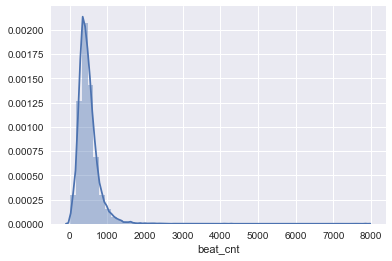

In [34]:
sns.distplot(df['beat_cnt'], label='beat_count')
plt.show()

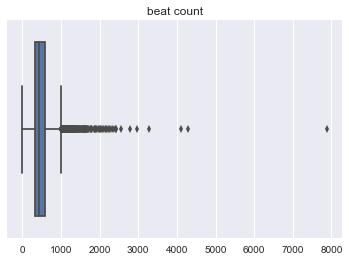

In [35]:
sns.boxplot(np.array(df['beat_cnt']))
plt.title('beat count')
plt.show()

In [36]:
out_liers_seg = [x for x in df['beat_cnt'] if x >= 1029.25]
print "Outliers based on segment count %d"%(len(out_liers_seg))

Outliers based on segment count 344


In [37]:
from scipy.stats import iqr
print ("(0th %, 25th%, 50th%, 75th%, 100th% respectively):", np.percentile(df['beat_cnt'], 0), np.percentile(df['beat_cnt'], 25), np.percentile(df['beat_cnt'], 50), np.percentile(df['beat_cnt'], 75), np.percentile(df['beat_cnt'], 100))
print ("number of songs with segment counts between 0% percentile and 25% percentile data:", (2495))
print ("number of songs with segment counts between 25% percentile and 50% percentile data:", (2505))
print ("number of songs with segment counts between 50% percentile and 75% percentile data:", (2500))
print ("number of songs with segment counts between 75% percentile and 100% percentile data:", (2500))

('(0th %, 25th%, 50th%, 75th%, 100th% respectively):', 0.0, 317.0, 434.0, 588.0, 7880.0)
('number of songs with segment counts between 0% percentile and 25% percentile data:', 2495)
('number of songs with segment counts between 25% percentile and 50% percentile data:', 2505)
('number of songs with segment counts between 50% percentile and 75% percentile data:', 2500)
('number of songs with segment counts between 75% percentile and 100% percentile data:', 2500)


In [39]:
beat_count=list(df['beat_cnt'])
print(song_label[beat_count.index(7880)], '-', df.get_year[beat_count.index(7880)])
print ("Number of beats in this song: ", beat_count[beat_count.index(7880)])
print ("Duration of the track", df.get_duration[beat_count.index(7880)])

print(song_label[beat_count.index(0)], '-', df.get_year[beat_count.index(0)])
print ("Number of beats in this song: ", beat_count[beat_count.index(0)])
print ("Duration of the track", df.get_duration[beat_count.index(0)])

('Endless Light -Endless Light - Erik Berglund', '-', 0)
('Number of beats in this song: ', 7880.0)
('Duration of the track', 1815.2224000000001)
('Windsor Strings -Someone to Watch Over Me - Frank Chacksfield', '-', 0)
('Number of beats in this song: ', 0.0)
('Duration of the track', 151.82321999999999)


# Analysis on beat density

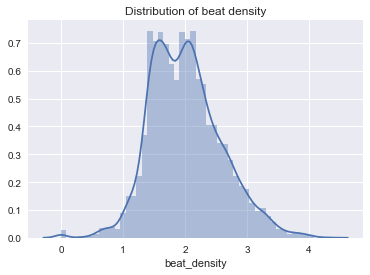

In [63]:
sns.distplot(df['beat_density'])
plt.title("Distribution of beat density")
plt.show()

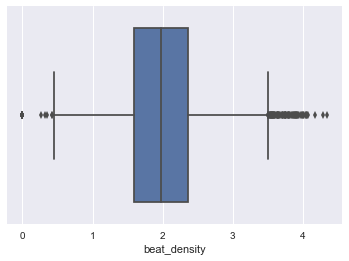

In [40]:
sns.boxplot(df['beat_density'])
plt.show()

In [41]:
for i in range(10000):
    if df['beat_cnt'][i] == 0:
        print(i, song_label[i])

(276, 'Windsor Strings -Someone to Watch Over Me - Frank Chacksfield')
(300, 'Voices of Angles - Christmas Favorites from the American Boychoir -Stille nacht_ heilige nacht - The American Boychoir')
(799, 'extrasensory perception compiled by martin & Liquid Soul -Liquid Frequencies (liquid Soul Mix) - liquid soul & freq')
(1281, 'About Time -Genuine - Five Fingers of Funk')
(1529, 'Respighi: Ancient Airs and Dances -Ancient Airs and Dances (1996 Digital Remaster)_ Suite No. 2: III.  Campanae parisienses (anon.) - Aria (Marin Mersenne) - Sir Neville Marriner')
(1612, 'Boo-Tay -Snippet 15 - Bare Jr.')
(1894, 'Voyages -Sir\xc3\xa8ne - Marc Perrone')
(2159, 'Bares y Fondas -Noches Arabes - Los Fabulosos Cadillacs')
(2727, 'Produced & Remixed -Chinz Ninja (Rui Da Silva mix) - Smart Alex')
(3622, 'Prayer -Kyrie Eleison - Jane Winther')
(3796, 'Ole Ola - Futebol Bonito! -Ole Ola - Grupo Batuque')
(4237, "Thrill Me -Thrill Me (Atfc's Jackhammer Re-Rub) - Junior Jack")
(4290, 'Beats_ Breaks_ & 

#### From the above we conclude that there are 25 songs who does not have beats information.

In [42]:
beat_density=list(df['beat_density'])
out_liers_seg = [x for x in beat_density if x >= 4]
for i in out_liers_seg:
    print (song_label[beat_density.index(i)], beat_density[beat_density.index(i)])
print ("_"*80)
print ("_"*80)
out_liers_seg = [x for x in beat_density if x <= 0.5 and x !=0]
for i in out_liers_seg:
    print (song_label[beat_density.index(i)], beat_density[beat_density.index(i)])

('Virtuous Woman -Empress So Divine - Warrior King', 4.0439278461616723)
('In Concert 1987 - Abigail -The Portrait (Live) (Reissue) (Album Version) - King Diamond', 4.0479781727433508)
('Morning to 3am -Ego is the drug/3am - The Frequency', 4.0696904374936187)
('Been There All The Time -Been There All The Time - Dinosaur Jr.', 4.1684012350791626)
('It Is What It Is -It Is What It Is (feat. Anton X) - Omni', 4.0004392148888011)
("Future's Bright -Ala Kaboo (Idjut Boy's H-Bar Mix) - Sound 5", 4.043618011352069)
('Lady Sleep -Birch - Maximilian Hecker', 4.0186578147733316)
('Eazy E & Posse -Rockberry Jam - L.a. Dream Team', 4.0075493083373193)
('Premonition -Severe Severing - Klaus Badelt', 4.0620278230173632)
("Hushaby Baby: Lullaby Renditions of Garth Brooks -Two of a Kind_ Workin' on a Full House - Hushabye Baby", 4.0570976915649721)
('Endless Light -Endless Light - Erik Berglund', 4.3410658660889156)
('Kalkofe liest Asmussen - Lachen ist gesund Vol.1 -Kapitel 4 - Oliver Kalkofe', 4.28

### Songs with high beat density
1. https://www.youtube.com/watch?v=JvYportR4_k | Empress So Divine - Warrior King | 4.043927846161672
2. https://www.youtube.com/watch?v=qYxIdvaiBgY#t=4m07s | Ego is the drug/3am - The Frequency | 4.069690437493619
3. https://www.youtube.com/watch?v=bPyV_TK3RYo | Future's Bright - Ala Kaboo (Idjut Boy's H-Bar Mix) | 4.043618011352069

### Songs with low beat density
1. https://www.youtube.com/watch?v=okURSCKnEFc | Prayer - The Lords Prayer - Jane Winther | 0.4255773643362325
2. https://www.youtube.com/watch?v=eRf1-wLp8VY | De Kommissar 1 - Der Plan | 0.4874286526309711
3. https://www.youtube.com/watch?v=f17hnWfPno4 | Mantra - Om - Jane Winther | 0.3216672447983364

## Tempo Analysis

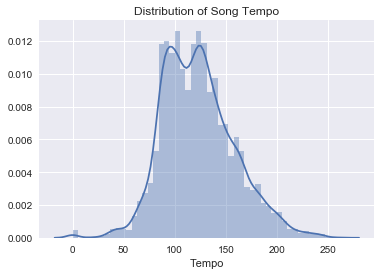

In [43]:
sns.distplot(np.array(df['get_tempo']))
plt.xlabel('Tempo')
plt.title('Distribution of Song Tempo')
plt.show()

By looking at above graphs we can conclude that song tempo distribution looks similar to that of beats density distribution.

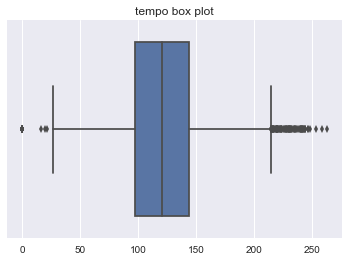

In [44]:
sns.boxplot(np.array(df['get_tempo']))
plt.title('tempo box plot')
plt.show()

In [45]:
tempo_array = list(df['get_tempo'])
out_liers_seg = [x for x in tempo_array if x >= 250]
for i in out_liers_seg:
    print (song_label[tempo_array.index(i)], tempo_array[tempo_array.index(i)])
print ("_"*80)
print ("_"*80)
out_liers_seg = [x for x in tempo_array if x <= 30 and x !=0]
for i in out_liers_seg:
    print (song_label[tempo_array.index(i)], tempo_array[tempo_array.index(i)])

('Been There All The Time -Been There All The Time - Dinosaur Jr.', 253.357)
('Endless Light -Endless Light - Erik Berglund', 262.82799999999997)
('Kalkofe liest Asmussen - Lachen ist gesund Vol.1 -Kapitel 4 - Oliver Kalkofe', 258.67700000000002)
________________________________________________________________________________
________________________________________________________________________________
('Prayer -The Lords Prayer - Jane Winther', 27.163)
('Bardo -Deep Voices - Jane Winther', 21.437999999999999)
('Mantra -Om - Jane Winther', 19.657)
('1970: The Complete Fun House Sessions -Lost In The Future (False Start -#1) - The Stooges', 26.663)
('Bone Dry - Original Motion Picture Soundtrack -Hunted - Scott Glasgow', 16.257999999999999)


We are getting the same songs as that we got in beat density analysis

### Time signature analysis

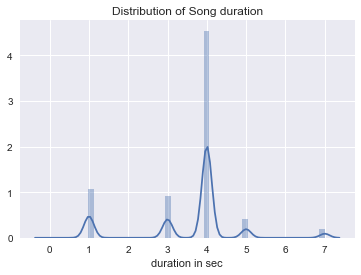

In [46]:
time_signature = list(df['get_time_signature'])
sns.distplot(time_signature)
plt.xlabel('duration in sec')
plt.title('Distribution of Song duration')
plt.show()

In [47]:
print (time_signature.count(0))
print (time_signature.count(1))
print (time_signature.count(3))
print (time_signature.count(4))
print (time_signature.count(5))
print (time_signature.count(7))

3
1498
1278
6351
589
281


### Some of time signature 7 songs
1. https://www.youtube.com/watch?v=LrUfWdr4TF4 : Left To Starve - Eyehategod
2. https://www.youtube.com/watch?v=3MVUpvmR_rI : The Lucky Ones - 56 Days - Pride Tiger
3. https://www.youtube.com/watch?v=XlrCAH0R9PA : Poor Tom (Album Version) - Led Zeppelin
4. https://www.youtube.com/watch?v=baa6TfHjqSs : Rock The Night - Hellsongs
5. https://www.youtube.com/watch?v=QByXBiA5urw : Fallin in Love Again - Ann Hampton Callaway
6. https://www.youtube.com/watch?v=L1S915sAkBk : The Wreckage Intro (Album Version) - Throw The Fight
7. https://www.youtube.com/watch?v=dKbb4K9YuoQ : Peace Dance - Terry Riley
8. https://www.youtube.com/watch?v=FgoRAad8eoM : No. 6 The Coombe - The Chieftains

### Some of time signature 6 songs
1. https://www.youtube.com/watch?v=XiwrZTIZwdc : Honey I Sugar Pie - Tanto Metro & Devonte
2. https://www.youtube.com/watch?v=lvGmsPPg-vY : Young Blood (2007 Digital Remaster) - Whitesnake
3. https://www.youtube.com/watch?v=ONgISWkNTAY : The Bubble - Tha Liks featuring King T
4. https://www.youtube.com/watch?v=4SjI2aB3ryo : 15 Step - Radiohead
5. https://www.youtube.com/watch?v=_dDVmJGJTLs : Crazy Groove - Terje Lie
6. https://www.youtube.com/watch?v=B3l0kpl5tA4 : King Of Pain - The Police
7. https://www.youtube.com/watch?v=7bUxA9pveus : Getting Closer - Cocoa Tea

### Some of time signature 4 songs
1. https://www.youtube.com/watch?v=IKqV7DB8Iwg : The Black Eyed Peas - Let's Get It Started
2. https://www.youtube.com/watch?v=1jkH7An7dKk : Larger Than Life - Backstreet Boys
3. https://www.youtube.com/watch?v=863fYC-Mb_Q : Hit The Lights - Metallica
4. https://www.youtube.com/watch?v=nvg2dDGKgZI : Welcome 2 Detroit - Trick Trick / Eminem
5. https://www.youtube.com/watch?v=O-V-NPpb6bM : Talk About Us - Jennifer Lopez
6. https://www.youtube.com/watch?v=yd8jh9QYfEs : Don't Stop The Music - Rihanna
7. https://www.youtube.com/watch?v=xE2onUOa5u4 : Did It Again (featuring Kid Cudi) - Shakira
8. https://www.youtube.com/watch?v=oyFmNPoDbDU : Lively Up Yourself - Bob Marley

### Some of time signature 1 songs
1. https://www.youtube.com/watch?v=ia6Tvpj6dPw : Bob Marley - Small Axe
2. https://www.youtube.com/watch?v=eY_mrU8MPfI : Ring The Alarm - Beyoncé
3. https://www.youtube.com/watch?v=griginkXo_I : Last Good Time in Town
4. https://www.youtube.com/watch?v=jlvY1o6XKwA : Rihanna - We Ride
5. https://www.youtube.com/watch?v=DDTvLldOgZs : There Are More Questions Than Answers - Johnny Nash
6. https://www.youtube.com/watch?v=m2Rqa6JTtIc : CHECKERS Don't Stop Dan
7. https://www.youtube.com/watch?v=5s_IHUuDGnU : Eagles - 'You Never Cry Like A Lover'

#### What is a Key in Music?
In music a key is the major or minor scale around which a piece of music revolves. A song in a major key is based on a major scale. A song in a minor key is based on a minor scale.

A song played in the ‘key of C major’ revolves around the seven notes of the C major scale – C, D, E, F, G, A, and B. That means the fundamental notes making up the song’s melody, chords, and bassline are all derived from that group of notes.

A song in the ‘key of F major’ uses the notes of the F major scale – F, G, A, Bb, C, D, and E.

Similarly, a piece of music can be in a minor key and revolve around a natural minor scale. For example, a song in the ‘key of D minor’ uses the notes of the D minor scale – D, E, F, G, A, Bb, and C.

Any major scale or natural minor scale can serve as a key for a piece of music.

#### How Many Music Keys Are There?
Since there are 12 major scales, there are 12 major keys. Likewise, there are 12 minor scales and, therefore, 12 minor keys. So there are 24 keys all together.

Three of the major keys can be named 2 different ways – one way with sharp note names, and the other way with flat note names. This results in 15 different major key spellings.

As an example, the keys of Gb major and F# major contain the exact same notes. The former is spelled using flat note names (Gb, Ab, Bb, Cb, Db, Eb, and F), while the latter is spelled with equivalent sharp note names (F#, G#, A#, B, C#, D#, and E#). There will be times when choosing one spelling over another is preferable. (More on that later.)

In the same way, there are 15 different minor key spellings.

In total, there are 24 keys and 30 ways to spell them.

Credits: https://www.studybass.com/lessons/harmony/keys-in-music/

#### Analysis on song key

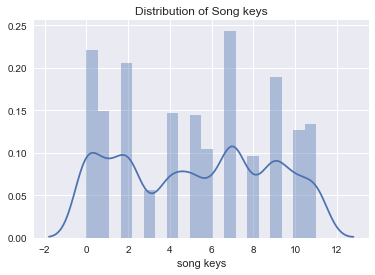

In [48]:
song_key = list(df['get_key'])
sns.distplot(song_key)
plt.xlabel('song keys')
plt.title('Distribution of Song keys')
plt.show()

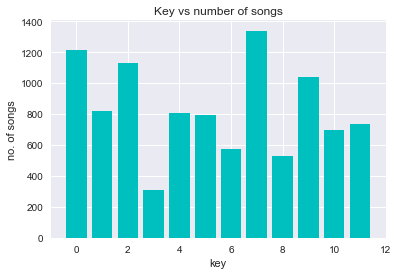

0     1213
1      821
2     1129
3      310
4      810
5      795
6      577
7     1339
8      528
9     1040
10     700
11     738
Name: get_key, dtype: int64

In [49]:
key_songs= df['get_key'].value_counts()
key_songs=key_songs.sort_index()
#print key_songs.columns
plt.bar(range(12),key_songs,color='c')
plt.title('Key vs number of songs')
plt.xlabel('key')
plt.ylabel('no. of songs')
plt.show()
key_songs

### Songs with key value = 1
1. https://www.youtube.com/watch?v=hiTedyIXJ9k : CHECKERS- OH OH OH BABY
2. https://www.youtube.com/watch?v=n6P0SitRwy8 : Heart-Shaped Box - Nirvana
3. https://www.youtube.com/watch?v=eIAcK3TBQK8 : Soul Almighty - Memphis - Bob Marley
4. https://www.youtube.com/watch?v=5yAzij7livk : Locomotive (Complicity) - Guns N' Roses
5. https://www.youtube.com/watch?v=jJTWiPkp5P4 : Johnny Cash - You Tell Me
6. https://www.youtube.com/watch?v=yqSqpmj4xWw : THE IMPRESSIONS-i've found that i've lost
7. https://www.youtube.com/watch?v=mQvteoFiMlg : Eminem - The Way I Am
8. https://www.youtube.com/watch?v=rV8NHsmVMPE : Maroon 5 - Harder To Breathe

### Songs with key value = 2
1. https://www.youtube.com/watch?v=JWA5hJl4Dv0 : Akon - Don't Matter
2. https://www.youtube.com/watch?v=QuzbNaMIccY : Chris Brown - I Love You
3. https://www.youtube.com/watch?v=dOIC9HoNE_s : Que Vuelvas - Shakira
4. https://www.youtube.com/watch?v=XkadyD9Z6Uc : Doug MacLeod - Angel In Hell

### Songs with key value = 3
1. https://www.youtube.com/watch?v=yJcXXnm_ss8 : Gaffos Ball - Sharon Shannon
2. https://www.youtube.com/watch?v=Ve1LNJEIKUE : Pushing Me Away (Album Version) - Linkin Park

### Loudness analysis

### Frequency
Frequency is determined by how fast the sound producing objects vibrates.

Frequency is the number of waves that move past a point in one second. In the diagram, if the sound waves move from the speaker, through the air, and into the ear in one second, what is the frequency of the sound?

Frequency = 6 waves per second

### Pitch
Pitch is how high or low a sound is.

Pitch depends on the frequency of a sound.
### Loudness
The loudness of a wave depends on its energy. The greater the energy the louder the sound. The greater the energy the greater the amplitude (height) of the sound wave

The loudness of sound is measured in units called decibels (dB). A decibel unit expresses the relative intensity of sounds on a scale from zero for the average least perceptible sound to about 100 dB, which is near the level most people find uncomfortably loud. Normal speech is around 50 to 60 dB. The following chart demonstrates the sound scale in decibels.


### In the diagram:

Wave A and B have the same frequency, but A is louder.
Waves A and B have the same pitch.

Waves C and D have the same frequency, but C is louder.
Waves C and D have the same pitch.
<img src='http://scienceprojectideasforkids.com/wp-content/uploads/2010/05/sound-frequency.jpg'>

Credits: http://scienceprojectideasforkids.com/2010/sound-pitch-loudness/

Q: I've heard of rooms which are soundproofed so well that their decibels are negative and induce hallucinations in the people who sit in them, what does 0dB sound like as opposed to -14dB?

Ans: Decibels aren't an absolute measure of sound energy, they're a comparison with a reference level. It's similar to the Celsius temperature scale where 0 is set at the freezing point of water; when measuring the sound in a room 0dB is set at the threshold of human hearing (the quietest sound a human can hear).
It's also worth noting that the meaning of 0dB can depend on context. For example, on professional recording equipment, 0dB is the loudest level before distortion occurs. The scale is selected depending on what's useful in a particular situation.
credits: reddits

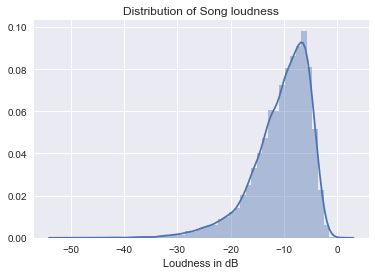

In [50]:
song_loudness = list(df['get_loudness'])
sns.distplot(song_loudness)
plt.xlabel('Loudness in dB')
plt.title('Distribution of Song loudness')
plt.show()

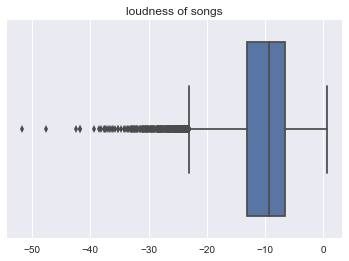

In [51]:
sns.boxplot(song_loudness)
plt.title('loudness of songs')
plt.show()

In [52]:
indices = [i for i, x in enumerate(song_loudness) if x < -45]
print(len(indices))
for i in indices:
    print(song_label[i])

2
Here There And Everywhere -Derek Taylor - Introduction - The Beatles
Vena Cava -Vena Cava 8 - Diamanda Galas


### song whose loudness greater than 0
1. https://www.youtube.com/watch?v=BqkkqOK3yoo : Power Pill Fist - Chuckanut Drive

### song whose loudness less than -50bB

1. https://www.youtube.com/watch?v=CHLQs6u9wXw : Here There And Everywhere - The Beatles

### Correlation matrix between analysed features

In [53]:
df=df.fillna(0)

In [54]:
data=pd.DataFrame(
{
    "get_end_of_fade_in":df['get_end_of_fade_in'],
    "get_time_signature":df['get_time_signature'],
    "get_mode":df['get_mode'],
    "get_loudness":df['get_loudness'],
    "get_song_hotttnesss":df['get_song_hotttnesss'],
    "get_key":df['get_key'],
    "get_year":df['get_year'],
    "get_tempo":df['get_tempo'],
    "beat_cnt":df['beat_cnt'],
    "seg_cnt":df['seg_cnt'],
    "get_start_of_fade_out":df['get_start_of_fade_out']
})
print data.shape
corr = data.corr()
corr

(10000, 11)


,beat_cnt,get_end_of_fade_in,get_key,get_loudness,get_mode,get_song_hotttnesss,get_start_of_fade_out,get_tempo,get_time_signature,get_year,seg_cnt
beat_cnt,1.000000,0.090761,0.017086,0.132158,-0.051148,0.036810,0.812650,0.488005,0.135512,0.028448,0.718912
get_end_of_fade_in,0.090761,1.000000,-0.013222,-0.110620,-0.004276,-0.001777,0.112379,-0.013693,0.021798,0.020911,0.033881
get_key,0.017086,-0.013222,1.000000,0.050274,-0.172049,0.011427,0.014718,0.009821,0.003124,-0.000949,0.040357
get_loudness,0.132158,-0.110620,0.050274,1.000000,-0.045518,0.186585,0.064221,0.179354,0.116122,0.140746,0.168848
get_mode,-0.051148,-0.004276,-0.172049,-0.045518,1.000000,-0.016095,-0.048653,-0.015578,-0.039884,-0.013662,-0.083272
get_song_hotttnesss,0.036810,-0.001777,0.011427,0.186585,-0.016095,1.000000,0.013534,0.054819,0.044281,0.363363,-0.022936
get_start_of_fade_out,0.812650,0.112379,0.014718,0.064221,-0.048653,0.013534,1.000000,-0.006973,0.111136,0.001921,0.831457
get_tempo,0.488005,-0.013693,0.009821,0.179354,-0.015578,0.054819,-0.006973,1.000000,0.055251,0.060045,0.066168
get_time_signature,0.135512,0.021798,0.003124,0.116122,-0.039884,0.044281,0.111136,0.055251,1.000000,0.016446,0.119884
get_year,0.028448,0.020911,-0.000949,0.140746,-0.013662,0.363363,0.001921,0.060045,0.016446,1.000000,-0.023595


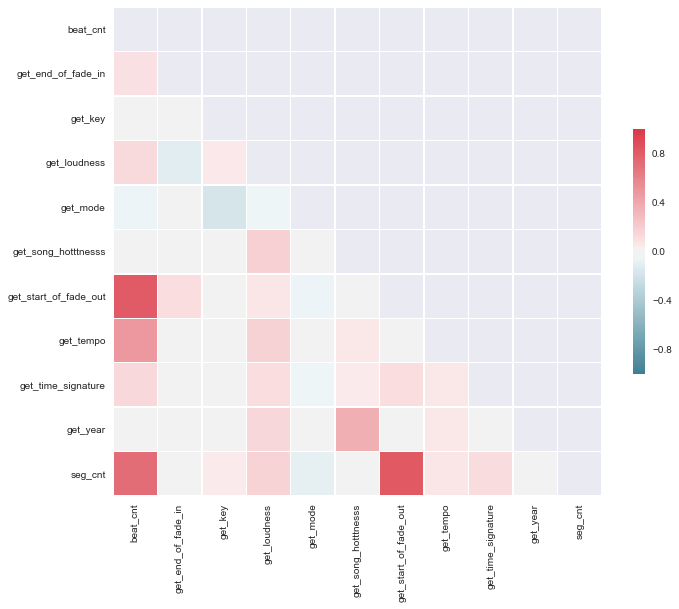

In [55]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

(array([    9.,     5.,     3.,    29.,    97.,   195.,   288.,   629.,
         1227.,  2198.]),
 array([ 1926. ,  1934.4,  1942.8,  1951.2,  1959.6,  1968. ,  1976.4,
         1984.8,  1993.2,  2001.6,  2010. ]),
 <a list of 10 Patch objects>)

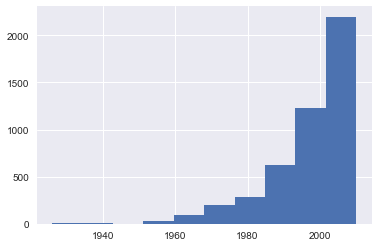

In [56]:
# per year number of songs
song_years = [x for x in df['get_year'] if x != 0]
plt.hist(song_years)

Here we have 5320 songs which does not have year.

In [57]:
seg_pitch_avg=np.empty((10000,12))
for i in range(10000):
    r=int(df['seg_cnt'][i])
    arr=df['get_segments_pitches'][i]
    for j in range(12):
        su=0
        for k in range(r):
            su+=arr[k,j]
        avg=su/r
        seg_pitch_avg[i,j]=avg

In [58]:
seg_timbre_avg=np.empty((10000,12))
for i in range(10000):
    r=int(df['seg_cnt'][i])
    arr=df['get_segments_timbre'][i]
    for j in range(12):
        su=0
        for k in range(r):
            su+=arr[k,j]
        avg=su/r
        seg_timbre_avg[i,j]=avg

In [59]:
new=pd.DataFrame(
{
    "seg_density":df['seg_density'],
    "loudness":df['get_loudness'],
    "mode":df['get_mode'],
    "key":df['get_key'],
    "end_fade_in":df['get_end_of_fade_in'],
    "start_fade_out":df['get_start_of_fade_out'],
    "bars_cnt":df['bars_cnt'],
    "seg_cnt":df['seg_cnt'],
    "year":df['get_year'],
    "duration":df['get_duration'],
    "tempo":df['get_tempo'],
    "time_sign":df['get_time_signature'],
    "hotness":df['get_song_hotttnesss']
})
print new.shape

(10000, 13)


In [60]:
seg_pitch=pd.DataFrame(seg_pitch_avg,columns=['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12'])
seg_timbre=pd.DataFrame(seg_timbre_avg,columns=['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12'])

##### Build dataframe

In [61]:
frames=[new,seg_pitch,seg_timbre]
result=pd.concat(frames,axis=1)
print result.shape

(10000, 37)


In [62]:
result=result.fillna(value=0)

#### Standardize the data

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(result)
new_arr=scaler.transform(result)
new_result=pd.DataFrame(new_arr,columns=result.columns)

In [358]:
df_2=df_2.drop(['agg-label','mini-label','get_segments_timbre','get_segments_pitches'],axis=1)
print df_2.shape
print df_2.columns

(10000, 88)
Index([u'get_danceability', u'get_song_id', u'get_release',
       u'get_artist_hotttnesss', u'get_title', u'get_artist_longitude',
       u'get_beats_confidence', u'get_end_of_fade_in', u'get_time_signature',
       u'get_artist_id', u'get_sections_start', u'get_mode', u'get_loudness',
       u'get_artist_7digitalid', u'get_artist_terms_freq',
       u'get_similar_artists', u'get_artist_terms_weight',
       u'get_mode_confidence', u'get_segments_loudness_max_time',
       u'get_artist_familiarity', u'get_song_hotttnesss',
       u'get_time_signature_confidence', u'get_artist_name', u'get_key',
       u'get_artist_playmeid', u'get_artist_mbtags',
       u'get_analysis_sample_rate', u'get_year', u'get_key_confidence',
       u'get_artist_location', u'get_tatums_start', u'get_audio_md5',
       u'get_bars_start', u'get_bars_confidence', u'get_artist_mbid',
       u'get_track_7digitalid', u'get_artist_terms',
       u'get_segments_confidence', u'get_segments_loudness_start',


### Choosing number of clusters

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
s_coeff=[]
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,init='k-means++').fit(result)
    label=kmeans.labels_
    s_coeff.append(silhouette_score(result,label,metric='euclidean'))
    print "n-cluster:%d coefficient =%f"%(i,s_coeff[-1])

n-cluster:2 coefficient =0.734878
n-cluster:3 coefficient =0.707330
n-cluster:4 coefficient =0.575836
n-cluster:5 coefficient =0.459832
n-cluster:6 coefficient =0.421113
n-cluster:7 coefficient =0.392970
n-cluster:8 coefficient =0.384625
n-cluster:9 coefficient =0.352477
n-cluster:10 coefficient =0.325175
n-cluster:11 coefficient =0.322690
n-cluster:12 coefficient =0.332961
n-cluster:13 coefficient =0.340194
n-cluster:14 coefficient =0.347883
n-cluster:15 coefficient =0.311867
n-cluster:16 coefficient =0.315540
n-cluster:17 coefficient =0.302516
n-cluster:18 coefficient =0.301736
n-cluster:19 coefficient =0.302912


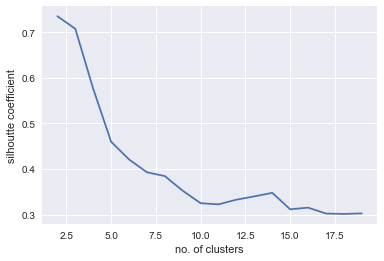

In [122]:
plt.plot(range(2,20),s_coeff)
plt.xlabel('no. of clusters')
plt.ylabel('silhoutte coefficient')
plt.show()

By observing the above graph we can say that the silhoutte coefficient is drastically decreasing for clusters from 2 to 9.
But from 10 the decrease in silhoutte coefficient is not high. Therefore we consider 10 clusters.

#### Applying tsne

In [67]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=27)
tsne_results = tsne.fit_transform(result)
tsne_df = pd.DataFrame(data=tsne_results, columns=['f1', 'f2'])

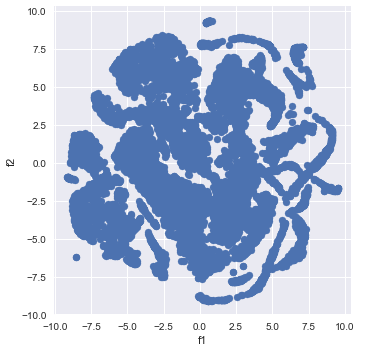

In [68]:
sns.FacetGrid(tsne_df, size=5).map(plt.scatter,"f1", "f2").add_legend()
plt.show()

In [69]:
def tsne_plot(labels,centers):
    tsne_df['label']=labels
    sns.FacetGrid(tsne_df,hue='label', size=5).map(plt.scatter,"f1", "f2").add_legend()
    plt.show()

### Applying kmeans clustering algorithm

In [70]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10,init='k-means++').fit(result)

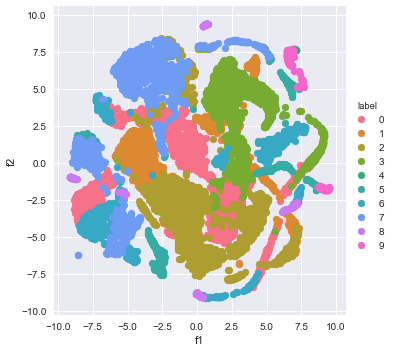

In [71]:
tsne_plot(kmeans.labels_,kmeans.cluster_centers_)

In [74]:
new_result['km-label']= kmeans.labels_
result['km-label']= kmeans.labels_
print new_result['km-label'].value_counts()
df['km-label']=kmeans.labels_

0    2017
2    2000
3    1473
7    1472
1    1131
6     980
5     507
8     208
9     190
4      22
Name: km-label, dtype: int64


In [103]:
frames=[df,seg_pitch,seg_timbre]
df_2=pd.concat(frames,axis=1)
print df_2.shape

(10000, 90)


In [104]:
df_2=df_2.drop(['get_artist_id','get_artist_location','get_artist_mbid','get_artist_mbtags',
                'get_artist_name','get_artist_terms','get_audio_md5','get_release',
                'get_similar_artists','get_song_id','get_track_id','get_title','get_segments_pitches','get_segments_timbre'],
               axis=1)
#get_beats_confidence, get_sections_start, get_artist_terms_freq, get_artist_terms_weight, 
# get_segments_loudness_max_time, get_tatums_start, get_bars_start, get_bars_confidence, get_segments_confidence, 
# get_segments_loudness_start, get_segments_start, get_segments_loudness_max, get_artist_mbtags_count,
# get_tatums_confidence, get_beats_start, get_sections_confidence

In [105]:
def average(feature):
    for i in range(10000):
        df_2[feature][i]=float(np.mean(df_2[feature][i]))

In [106]:
import warnings
warnings.filterwarnings('ignore')
average('get_beats_confidence')
average('get_sections_start')
average('get_artist_terms_freq')
average('get_artist_terms_weight')

In [111]:
df_2[['get_beats_confidence','get_sections_start','get_artist_terms_freq','get_artist_terms_weight']] = df_2[['get_beats_confidence','get_sections_start','get_artist_terms_freq','get_artist_terms_weight']].apply(pd.to_numeric)


In [112]:
average('get_segments_loudness_max_time')
average('get_tatums_start')
average('get_bars_start')
average('get_bars_confidence')

In [115]:
df_2[['get_segments_loudness_max_time','get_tatums_start','get_bars_start','get_bars_confidence']] = df_2[['get_segments_loudness_max_time','get_tatums_start','get_bars_start','get_bars_confidence']].apply(pd.to_numeric)


In [114]:
average('get_segments_confidence')
average('get_segments_loudness_start')
average('get_segments_start')
average('get_segments_loudness_max')

In [116]:
df_2[['get_segments_confidence','get_segments_loudness_start','get_segments_start','get_segments_loudness_max']] = df_2[['get_segments_confidence','get_segments_loudness_start','get_segments_start','get_segments_loudness_max']].apply(pd.to_numeric)


In [118]:
average('get_artist_mbtags_count')
average('get_tatums_confidence')
average('get_beats_start')
average('get_sections_confidence')
# get_segments_timbre, get_beats_confidence, get_sections_start, get_artist_terms_freq, 
# get_artist_terms_weight, get_segments_loudness_max_time, get_tatums_start, get_bars_start, 
# get_bars_confidence, get_segments_pitches, get_segments_confidence, get_segments_loudness_start, 
# get_segments_start, get_segments_loudness_max, get_artist_mbtags_count, get_tatums_confidence, get_beats_start,
# get_sections_confidence

In [119]:
df_2[['get_artist_mbtags_count','get_tatums_confidence','get_beats_start','get_sections_confidence']] = df_2[['get_artist_mbtags_count','get_tatums_confidence','get_beats_start','get_sections_confidence']].apply(pd.to_numeric)


In [125]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# split data into X and y
X = df_2.ix[:,df_2.columns!='km-label']
y = df_2['km-label']
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

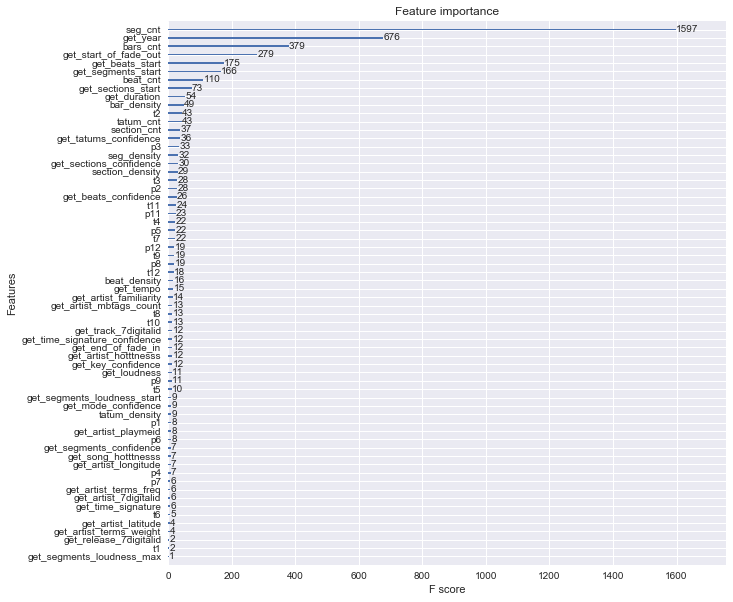

In [129]:
ax=plot_importance(model)
fig=ax.figure
fig.set_size_inches(10,10)
plt.show()

### Consider top 50 tags from dataframe

In [276]:
tag_tot=[]
for  i in df.index:
    y=df['get_artist_terms'][i]
    for j in y:
        tag_tot.append(j)
count=Counter(tag_tot)
count= count.most_common()
print count[:52]

[('rock', 6493), ('pop', 5476), ('electronic', 4453), ('jazz', 3596), ('united states', 3084), ('hip hop', 2926), ('alternative rock', 2753), ('folk', 2598), ('alternative', 2586), ('soul', 2491), ('pop rock', 2324), ('blues', 2281), ('country', 2215), ('american', 2207), ('punk', 2182), ('indie', 2167), ('guitar', 2163), ('funk', 2008), ('classic rock', 1985), ('acoustic', 1942), ('soundtrack', 1894), ('world', 1874), ('experimental', 1786), ('instrumental', 1781), ('metal', 1756), ('latin', 1663), ('hard rock', 1662), ('reggae', 1638), ('classic', 1620), ('singer-songwriter', 1619), ('rap', 1605), ('downtempo', 1605), ('ambient', 1603), ('vocal', 1596), ('male vocalist', 1577), ('house', 1564), ('indie rock', 1562), ('80s', 1546), ('disco', 1530), ('easy listening', 1499), ('electro', 1471), ('hardcore', 1447), ('ballad', 1365), ('female vocalist', 1361), ('electronica', 1337), ('r&b', 1328), ('germany', 1311), ('techno', 1308), ('90s', 1268), ('folk rock', 1227), ('heavy metal', 116

In [288]:
new_tags,val=zip(*count[:53])
tags_list=list(new_tags)
tags_list.remove("rock")
tags_list.remove("pop")
tags_list.remove("electronic")
print tags_list

['jazz', 'united states', 'hip hop', 'alternative rock', 'folk', 'alternative', 'soul', 'pop rock', 'blues', 'country', 'american', 'punk', 'indie', 'guitar', 'funk', 'classic rock', 'acoustic', 'soundtrack', 'world', 'experimental', 'instrumental', 'metal', 'latin', 'hard rock', 'reggae', 'classic', 'singer-songwriter', 'rap', 'downtempo', 'ambient', 'vocal', 'male vocalist', 'house', 'indie rock', '80s', 'disco', 'easy listening', 'electro', 'hardcore', 'ballad', 'female vocalist', 'electronica', 'r&b', 'germany', 'techno', '90s', 'folk rock', 'heavy metal', 'chill-out', 'synthpop']


In [323]:
ratio=np.empty((10,50))
r=0
print ratio.shape

(10L, 50L)


### Top  echo-tag distribution  cluster wise

In [281]:
df['km-label']=kmeans.labels_

In [324]:
from collections import Counter
from __future__ import division
import pylab as pl
def tag_count(lbl,feature):
    new_df=df.loc[df[feature]==lbl]
    length=len(new_df)
    tag_cnt=[]
    for  i in new_df.index:
        y=new_df['get_artist_terms'][i]
        for j in y:
            tag_cnt.append(j)
    counts=Counter(tag_cnt)
    counts= counts.most_common()
    print lbl,counts[:5],length
    t,c=zip(*counts)
    j=0
    for i in tags_list:
        if i in t:
            ratio[r,j]=c[t.index(i)]/length
            j+=1
    x=np.arange(50)
    pl.xticks(x,tags_list,rotation='vertical')
    pl.plot(x,ratio[r])

0 [('rock', 738), ('pop', 668), ('electronic', 577), ('hip hop', 478), ('jazz', 458)] 1058
1 [('rock', 1144), ('pop', 1048), ('electronic', 703), ('jazz', 676), ('folk', 587)] 1963
2 [('electronic', 303), ('rock', 248), ('pop', 226), ('jazz', 210), ('hip hop', 203)] 565
3 [('rock', 1142), ('pop', 836), ('electronic', 609), ('united states', 528), ('jazz', 520)] 1368
4 [('rock', 761), ('pop', 688), ('electronic', 671), ('hip hop', 561), ('jazz', 456)] 1513
5 [('electronic', 167), ('rock', 148), ('pop', 134), ('electronica', 104), ('techno', 98)] 234
6 [('rock', 17), ('electronic', 17), ('pop', 17), ('techno', 12), ('jazz', 12)] 29
7 [('electronic', 138), ('house', 96), ('rock', 89), ('techno', 83), ('pop', 81)] 205
8 [('rock', 1630), ('pop', 1289), ('electronic', 898), ('alternative', 772), ('alternative rock', 767)] 2015
9 [('rock', 576), ('pop', 489), ('jazz', 391), ('electronic', 370), ('united states', 319)] 1050


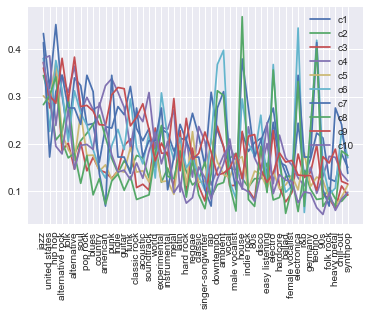

In [325]:
for i in range(10):
    tag_count(i,'km-label')
    r+=1
plt.legend(['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10'])
plt.figure(figsize=(10,10))
pl.show()

In [326]:
ratio=ratio.T
print ratio.shape

(50L, 10L)


In [331]:
col_sum=ratio.sum(axis=0)
probab=np.empty((50,10))
for i in range(50):
    for j in range(10):
        probab[i,j]=ratio[i,j]/col_sum[j]
print probab.sum(axis=0)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [336]:
probab[:,0]

array([ 0.0390219 ,  0.02854222,  0.04072591,  0.02734941,  0.01917015,
        0.03058703,  0.02913862,  0.02164096,  0.02189657,  0.01456931,
        0.02130016,  0.02104456,  0.02513419,  0.02360058,  0.02896822,
        0.02095936,  0.01865894,  0.02095936,  0.0135469 ,  0.02078896,
        0.02010735,  0.01669933,  0.01908495,  0.01882934,  0.02385618,
        0.01959615,  0.01388771,  0.02786061,  0.02061856,  0.01746613,
        0.0134617 ,  0.0131209 ,  0.02019255,  0.01661413,  0.01831814,
        0.01908495,  0.01201329,  0.02215217,  0.01456931,  0.01388771,
        0.01047968,  0.02198177,  0.01201329,  0.01516572,  0.02010735,
        0.01917015,  0.01141689,  0.01090568,  0.01618812,  0.0135469 ])

In [338]:
from scipy.stats import entropy
kl_divergence=np.empty((10,10))
for i in range(10):
    for j in range(10):
        kl_divergence[i,j]=entropy(probab[:,i],probab[:,j])
kl_divergence

array([[ 0.        ,  0.07897374,  0.03917424,  0.072716  ,  0.02844341,
         0.05011989,  0.09720732,  0.13036024,  0.04622855,  0.10018357],
       [ 0.07779559,  0.        ,  0.08540375,  0.04462304,  0.04613293,
         0.17123368,  0.14094661,  0.22879426,  0.0478332 ,  0.02566752],
       [ 0.03951177,  0.09200119,  0.        ,  0.13846652,  0.03224053,
         0.05839772,  0.09686671,  0.07255008,  0.11756203,  0.09906051],
       [ 0.06523263,  0.04375262,  0.12653809,  0.        ,  0.09075041,
         0.1481569 ,  0.13678558,  0.24439041,  0.01629174,  0.04897658],
       [ 0.02957366,  0.04939265,  0.03180725,  0.09935893,  0.        ,
         0.10561561,  0.12371582,  0.14705259,  0.06960441,  0.08208389],
       [ 0.05324896,  0.18848252,  0.05489536,  0.17288853,  0.10609976,
         0.        ,  0.0646546 ,  0.05265722,  0.1528805 ,  0.18487377],
       [ 0.08647131,  0.1449423 ,  0.09356774,  0.14366112,  0.11701902,
         0.06594805,  0.        ,  0.11010129

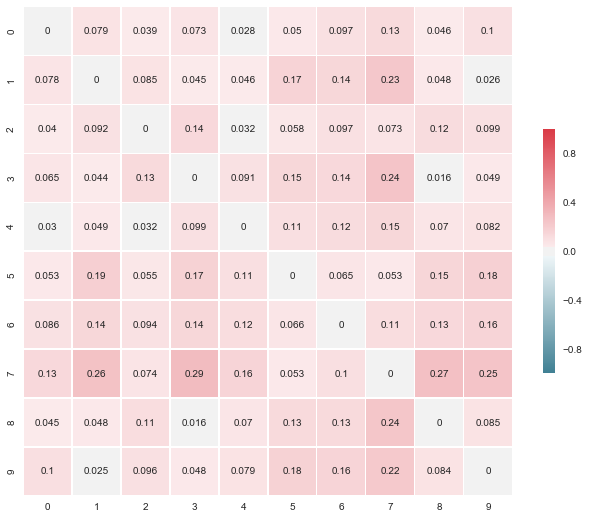

In [341]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(kl_divergence, cmap=cmap, vmax=1, center=0,square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [307]:
ratio_df=pd.DataFrame(ratio,columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10'])
print ratio_df.shape
print ratio_df.columns

(50, 10)
Index([u'c1', u'c2', u'c3', u'c4', u'c5', u'c6', u'c7', u'c8', u'c9', u'c10'], dtype='object')


In [308]:
corr1=ratio_df.corr()
corr1

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
c1,1.000000,0.413141,0.740793,0.457805,0.774745,0.638663,0.379375,0.394720,0.601625,0.349194
c2,0.413141,1.000000,0.476956,0.703345,0.638541,-0.010638,0.183896,-0.026758,0.638264,0.871043
c3,0.740793,0.476956,1.000000,0.170951,0.801633,0.670159,0.467943,0.694953,0.218253,0.474142
c4,0.457805,0.703345,0.170951,1.000000,0.304728,0.039023,0.164616,-0.166160,0.881344,0.707595
c5,0.774745,0.638541,0.801633,0.304728,1.000000,0.342638,0.236545,0.337150,0.426370,0.495273
c6,0.638663,-0.010638,0.670159,0.039023,0.342638,1.000000,0.684753,0.813675,0.100048,0.058216
c7,0.379375,0.183896,0.467943,0.164616,0.236545,0.684753,1.000000,0.621167,0.178118,0.163113
c8,0.394720,-0.026758,0.694953,-0.166160,0.337150,0.813675,0.621167,1.000000,-0.169984,0.059476
c9,0.601625,0.638264,0.218253,0.881344,0.426370,0.100048,0.178118,-0.169984,1.000000,0.462525
c10,0.349194,0.871043,0.474142,0.707595,0.495273,0.058216,0.163113,0.059476,0.462525,1.000000


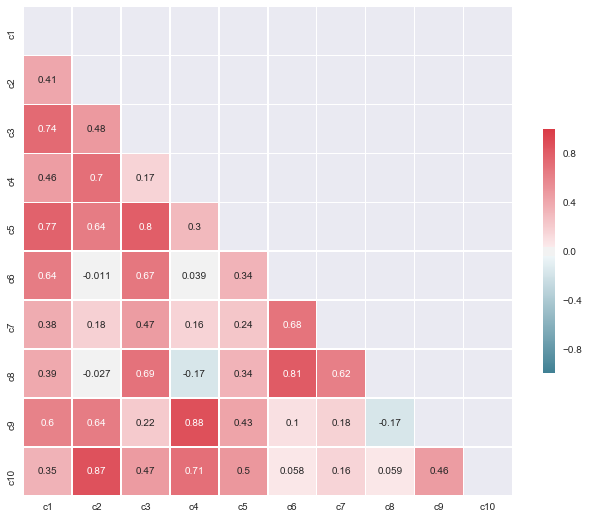

In [309]:
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=1, center=0,

            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### Applying minibatch kmeans clustering 

In [113]:
from sklearn.cluster import MiniBatchKMeans
mini_batch = MiniBatchKMeans(n_clusters=10,init='k-means++').fit(result)

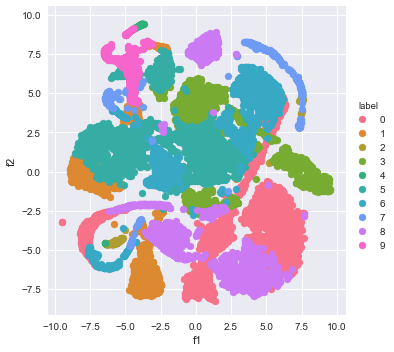

In [114]:
tsne_plot(mini_batch.labels_,mini_batch.cluster_centers_)

In [128]:
new_result['mini-label']= mini_batch.labels_
print new_result['mini-label'].value_counts()

0    2084
5    1879
8    1545
3    1538
6    1169
1     907
7     370
9     323
2     149
4      36
Name: mini-label, dtype: int64


### Top  echo nest tags distribution cluster wise

In [237]:
df['mini-label']=mini_batch.labels_

In [310]:
ratio=np.empty((10,50))
r=0
print ratio.shape

(10L, 50L)


0 [('rock', 1163), ('pop', 1098), ('electronic', 802), ('jazz', 647), ('united states', 591)] 2084
1 [('rock', 631), ('pop', 576), ('electronic', 479), ('hip hop', 415), ('jazz', 391)] 907
2 [('electronic', 100), ('house', 68), ('rock', 65), ('techno', 59), ('trance', 58)] 149
3 [('rock', 1287), ('pop', 952), ('electronic', 674), ('jazz', 589), ('united states', 582)] 1538
4 [('electronic', 32), ('rock', 27), ('techno', 26), ('pop', 25), ('electronica', 22)] 36
5 [('rock', 1512), ('pop', 1192), ('electronic', 854), ('alternative rock', 722), ('alternative', 716)] 1879
6 [('rock', 553), ('electronic', 548), ('pop', 488), ('hip hop', 453), ('jazz', 398)] 1169
7 [('electronic', 218), ('rock', 168), ('pop', 160), ('hip hop', 133), ('jazz', 131)] 370
8 [('rock', 880), ('pop', 741), ('jazz', 581), ('electronic', 528), ('united states', 491)] 1545
9 [('electronic', 218), ('rock', 207), ('pop', 189), ('jazz', 133), ('hip hop', 128)] 323


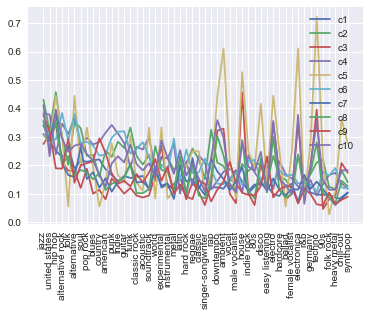

In [311]:
for i in range(10):
    tag_count(i,'mini-label')
    r+=1
plt.legend(['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10'])
plt.figure(figsize=(10,10))
pl.show()

In [312]:
ratio=ratio.T
print ratio.shape

(50L, 10L)


In [313]:
ratio_df=pd.DataFrame(ratio,columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10'])
print ratio_df.shape
print ratio_df.columns

(50, 10)
Index([u'c1', u'c2', u'c3', u'c4', u'c5', u'c6', u'c7', u'c8', u'c9', u'c10'], dtype='object')


In [314]:
corr1=ratio_df.corr()
corr1

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
c1,1.000000,0.538238,0.057727,0.648523,-0.191703,0.658818,0.712490,0.411195,0.833597,0.242998
c2,0.538238,1.000000,0.326865,0.483186,0.315625,0.627282,0.807108,0.545808,0.328060,0.690742
c3,0.057727,0.326865,1.000000,-0.139932,0.814168,-0.149692,0.411122,0.834710,0.010655,0.786176
c4,0.648523,0.483186,-0.139932,1.000000,-0.207334,0.887828,0.256253,0.001174,0.701925,0.111070
c5,-0.191703,0.315625,0.814168,-0.207334,1.000000,-0.191244,0.212084,0.593162,-0.247643,0.716240
c6,0.658818,0.627282,-0.149692,0.887828,-0.191244,1.000000,0.374541,0.040362,0.481968,0.207416
c7,0.712490,0.807108,0.411122,0.256253,0.212084,0.374541,1.000000,0.717469,0.466755,0.591567
c8,0.411195,0.545808,0.834710,0.001174,0.593162,0.040362,0.717469,1.000000,0.298197,0.849199
c9,0.833597,0.328060,0.010655,0.701925,-0.247643,0.481968,0.466755,0.298197,1.000000,0.117223
c10,0.242998,0.690742,0.786176,0.111070,0.716240,0.207416,0.591567,0.849199,0.117223,1.000000


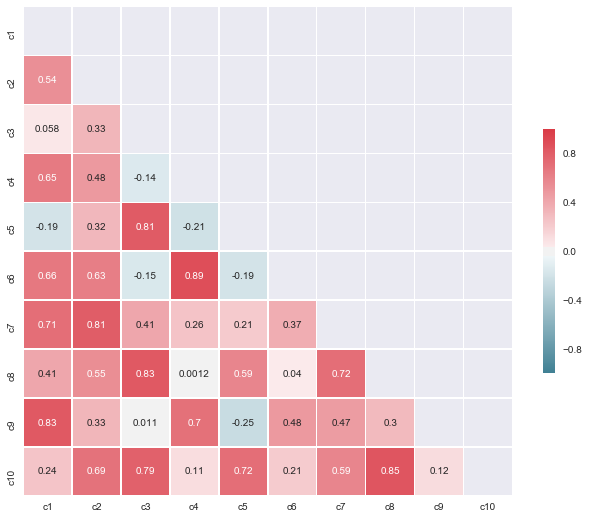

In [315]:
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=1, center=0,

            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

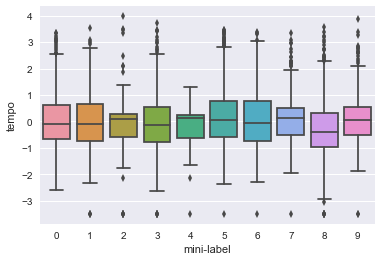

In [146]:
sns.boxplot(x='mini-label',y='tempo',data=new_result)
plt.show()

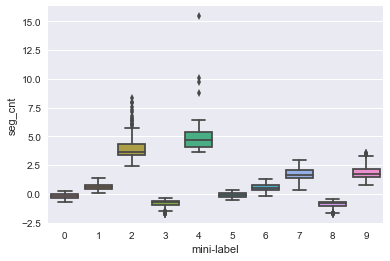

In [147]:
sns.boxplot(x='mini-label',y='seg_cnt',data=new_result)
plt.show()

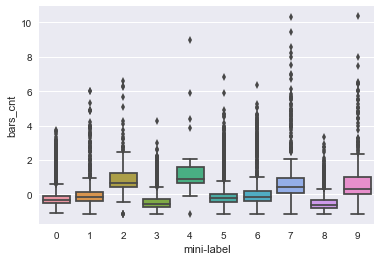

In [148]:
sns.boxplot(x='mini-label',y='bars_cnt',data=new_result)
plt.show()

### Applying Agglomerative clustering

In [239]:
from sklearn.cluster import AgglomerativeClustering
agg= AgglomerativeClustering(n_clusters=10).fit(result)

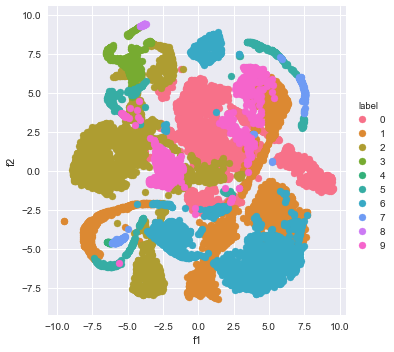

In [240]:
tsne_plot(agg.labels_,agg.n_leaves_)

In [241]:
new_result['agg-label']= agg.labels_
print new_result['agg-label'].value_counts()

0    2302
1    2111
2    2060
6    1749
9     803
5     433
3     291
7     197
4      27
8      27
Name: agg-label, dtype: int64


In [242]:
df['agg-label']=agg.labels_

In [316]:
ratio=np.empty((10,50))
r=0
print ratio.shape

(10L, 50L)


### Top tags distribution cluster wise

0 [('rock', 1918), ('pop', 1448), ('electronic', 1009), ('alternative', 871), ('alternative rock', 837)] 2302
1 [('rock', 1148), ('pop', 1069), ('electronic', 826), ('jazz', 659), ('united states', 600)] 2111
2 [('rock', 1539), ('pop', 1294), ('electronic', 1022), ('jazz', 836), ('hip hop', 799)] 2060
3 [('electronic', 200), ('rock', 184), ('pop', 172), ('jazz', 118), ('electronica', 117)] 291
4 [('rock', 16), ('pop', 14), ('electronic', 13), ('jazz', 11), ('trance', 10)] 27
5 [('electronic', 228), ('rock', 196), ('pop', 175), ('jazz', 158), ('hip hop', 143)] 433
6 [('rock', 1004), ('pop', 870), ('jazz', 635), ('electronic', 600), ('united states', 547)] 1749
7 [('electronic', 136), ('house', 96), ('rock', 82), ('techno', 82), ('trance', 78)] 197
8 [('electronic', 24), ('rock', 21), ('techno', 19), ('electronica', 17), ('pop', 17)] 27
9 [('electronic', 395), ('rock', 385), ('pop', 341), ('hip hop', 338), ('jazz', 283)] 803


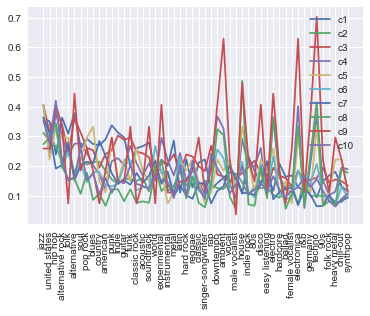

In [318]:
for i in range(10):
    tag_count(i,'agg-label')
    r+=1
plt.legend(['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10'])
plt.figure(figsize=(10,10))
pl.show()

In [319]:
ratio=ratio.T
print ratio.shape

(50L, 10L)


In [320]:
ratio_df=pd.DataFrame(ratio,columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10'])
print ratio_df.shape
print ratio_df.columns

(50, 10)
Index([u'c1', u'c2', u'c3', u'c4', u'c5', u'c6', u'c7', u'c8', u'c9', u'c10'], dtype='object')


In [321]:
corr1=ratio_df.corr()
corr1

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
c1,1.000000,0.587879,0.745600,0.077432,0.201634,0.172090,0.677313,-0.239141,-0.185433,0.211037
c2,0.587879,1.000000,0.657721,0.216824,0.439795,0.658892,0.850640,0.078143,-0.217300,0.709083
c3,0.745600,0.657721,1.000000,0.463337,0.373404,0.499109,0.475286,0.080536,0.061139,0.684270
c4,0.077432,0.216824,0.463337,1.000000,0.638569,0.734406,0.090352,0.788242,0.719851,0.587688
c5,0.201634,0.439795,0.373404,0.638569,1.000000,0.621890,0.338837,0.556014,0.398325,0.487802
c6,0.172090,0.658892,0.499109,0.734406,0.621890,1.000000,0.505721,0.651433,0.348167,0.815669
c7,0.677313,0.850640,0.475286,0.090352,0.338837,0.505721,1.000000,-0.045597,-0.260637,0.429571
c8,-0.239141,0.078143,0.080536,0.788242,0.556014,0.651433,-0.045597,1.000000,0.739650,0.470882
c9,-0.185433,-0.217300,0.061139,0.719851,0.398325,0.348167,-0.260637,0.739650,1.000000,0.220145
c10,0.211037,0.709083,0.684270,0.587688,0.487802,0.815669,0.429571,0.470882,0.220145,1.000000


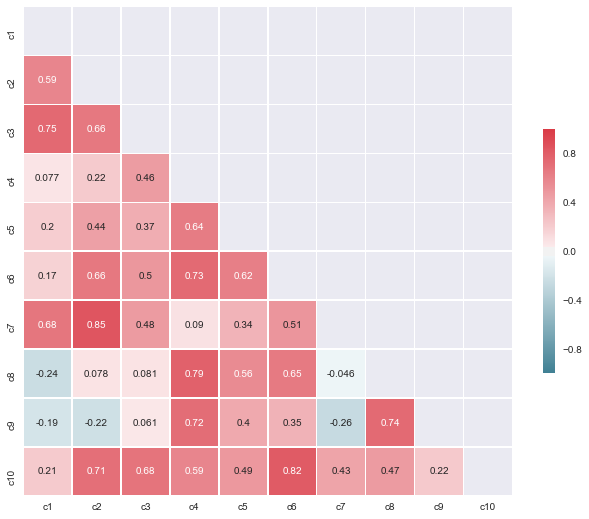

In [322]:
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=1, center=0,

            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [121]:
from sklearn.metrics import pairwise_distances
cluster_centers=mini_batch.cluster_centers_
pairwise_dist = pairwise_distances(cluster_centers, cluster_centers)
pairwise_dist = scaler.fit_transform(pairwise_dist)

#### Distance between cluster centers

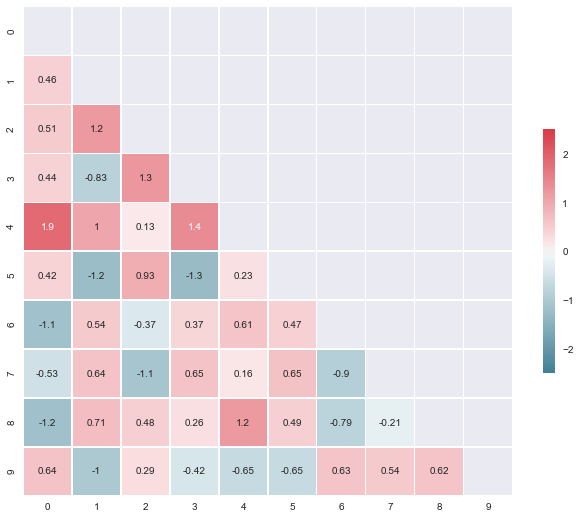

In [122]:
mask = np.zeros_like(pairwise_dist, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pairwise_dist, mask=mask, cmap=cmap, vmax=2, center=0,

            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [134]:
from sklearn.metrics.pairwise import euclidean_distances
for i in range(10):
    data_label = new_result.loc[new_result['mini-label']==i]
    data_label=data_label.drop(['km-label','agg-label','mini-label'],axis=1)
    distances = euclidean_distances(mini_batch.cluster_centers_[i], data_label)
    print('Cluster', i+1, ':',distances.argsort()[0][:5])

('Cluster', 1, ':', array([ 523,  960,  381, 2014,  701], dtype=int64))
('Cluster', 2, ':', array([679,  23,  99, 304, 708], dtype=int64))
('Cluster', 3, ':', array([138,  25,  14, 103,  29], dtype=int64))
('Cluster', 4, ':', array([ 647, 1005,  305, 1311, 1531], dtype=int64))
('Cluster', 5, ':', array([ 8, 31, 29,  9,  2], dtype=int64))
('Cluster', 6, ':', array([1566,   75, 1147, 1794, 1150], dtype=int64))
('Cluster', 7, ':', array([  43,   52,  236, 1143,  876], dtype=int64))
('Cluster', 8, ':', array([174, 219, 286, 331, 295], dtype=int64))
('Cluster', 9, ':', array([1428,  975,  723,  319,  254], dtype=int64))
('Cluster', 10, ':', array([ 55,  40, 146, 158, 179], dtype=int64))


### Cluster 1
1. https://www.youtube.com/watch?v=pj1mVUEHeUE | Donny Hathaway- This Christmas
2. https://www.youtube.com/watch?v=TrOvQ9JAf3g | Mitch Ryder & The Detroit Wheels - Jenny Take A Ride / C C Rider
3. https://www.youtube.com/watch?v=Q2yu13-m-eE | The Green Album - Don't Let Go - Weezer

### Cluster 2
1. https://www.youtube.com/watch?v=3obVI8BG9yw | Le tortillard - Bézu
2. https://www.youtube.com/watch?v=SK3TMXWlAgQ | Rainie Yang - Nu Sheng Wo Zui Da
3. https://www.youtube.com/watch?v=ll7CV6zSgXY | Ftei O Erotas - Angela Dimitriou

### Cluster 3
1. https://www.youtube.com/watch?v=ZT1m9EY6Vrc | The Flame - Chimaira
2. https://www.youtube.com/watch?v=ijriTFyKvAk | Cold Blood (LP Version) - Kix
3. https://www.youtube.com/watch?v=CqEDBqVDYS8 | I Just Need Your Lovin' - Original - Chris Farlowe

### Cluster 4
1. https://www.youtube.com/watch?v=RFoQiZMoMDA | Sister Hazel - Space Between Us
2. https://www.youtube.com/watch?v=8s-KJsBmO60 | Stevie Ray Vaughan - Empty Arms
3. https://www.youtube.com/watch?v=u0STmox8mIc | Stairs To the Attic - The Antlers

### Cluster 5
1. https://www.youtube.com/watch?v=oXd2gbyjsUg | Winter (Four Seasons) - Ulytau
2. https://www.youtube.com/watch?v=qpM5RxWyjjQ | Risen From Within - Astarte
3. https://www.youtube.com/watch?v=oScZuIp6ce8 | Amor De Cabaret - Sonora Santanera

### Cluster 6
1. https://www.youtube.com/watch?v=cph7qZoE5d8 | Ma Rainey's Black Bottom - Ma Rainey
2. https://www.youtube.com/watch?v=0wJUdYgI0R4 | They Say (Album) - Jupiter Rising
3. https://www.youtube.com/watch?v=7EienpYjX6o | Terra - Luar Na Lubre

### Cluster 7
1. https://www.youtube.com/watch?v=UEokVJk9MiA | Tonight Will Be Alright - Lionel Richie
2. https://www.youtube.com/watch?v=d3Xq5MYel6A | Hatesex - The Greed of Our Stare

### Cluster 8
1. https://www.youtube.com/watch?v=C1Op-N1Cqdg | Our Darkest Days - Eighteen Visions
2. https://www.youtube.com/watch?v=p-HSrW0l9Q8 | The Impressions The Girl I Find
2. https://www.youtube.com/watch?v=BufKGiVT71s | Glory Be - R.L. Burnside

### Cluster 9
1. https://www.youtube.com/watch?v=VPFP_I1p1w8 | The Impressions The Girl I Find
2. https://www.youtube.com/watch?v=SGMSMSbAWRY | Blake's Worried Blues - Blind Blake
3. https://www.youtube.com/watch?v=MbpDCRivXrA | Cheatin' In The Next Room - Tyrone Davis

### Cluster 10
1. https://www.youtube.com/watch?v=K68V2s7YH4I | Helen Love - So Hot
2. https://www.youtube.com/watch?v=cRAOgqPHIr0 | BANDIDO - END OF THE ROAD
3. https://www.youtube.com/watch?v=27tbkY4DPKg | Not Buried Deep Enough - The Gone Jackals